In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [80]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [81]:
RANDOM = 427

TRAIN_DATA_FILE = 'train.csv'
TEST_DATA_FILE = 'test.csv'

In [82]:
def prepare_category(df):
    ''' Преобразует признаки Ecology_2, Ecology_3, Shops_2 к числовому типу.
        Заменяет 'A' на 0, 'B' на 1.
    '''
    df_new = df.copy()
    col_list = ['Ecology_2', 'Ecology_3', 'Shops_2']
    for col in col_list:
        df_new[col] = df[col].map({'A': 0, 'B': 1})
    return df_new

##### load data

In [83]:
data_train = pd.read_csv(TRAIN_DATA_FILE)
data_test = pd.read_csv(TEST_DATA_FILE)

predicts = list(data_train.columns[:-1])

target = data_train.columns[-1]

X = data_train[predicts]
y = data_train[target]

##### solve year problem

In [87]:
X.loc[X['HouseYear'] > 2020, ['Id', 'HouseYear']]

,Id,HouseYear
1497,10814,20052011
4189,11607,4968


In [88]:
X.loc[X['Id'] == 10814, 'HouseYear'] = 2008

In [89]:
X.loc[X['Id'] == 11607, 'HouseYear'] = 1968

In [90]:
X.loc[X['HouseYear'] > 2020, :].shape[0]

0

In [91]:
data_test.loc[data_test['HouseYear'] > 2020, :].shape[0]

0

##### train test split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=RANDOM)

In [94]:
X_train.shape, X_valid.shape

((7000, 19), (3000, 19))

In [95]:
y_train.shape, y_valid.shape

((7000,), (3000,))

##### data prepare

In [96]:
X_train = prepare_category(X_train)
X_valid = prepare_category(X_valid)

In [118]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,7000.000000,7000.000000,7000.000000,7000.000000,5544.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,3665.000000,7000.000000,7000.000000,7000.000000
mean,8385.493429,50.687286,1.893857,56.205197,36.249696,6.482429,8.485286,12.587286,1984.694571,0.119380,0.988714,0.972000,24.572429,5306.521714,8.123000,1143.267394,1.331714,4.214000,0.918571
std,4846.222527,43.717704,0.849778,20.284347,18.234259,33.996835,5.239792,6.778839,18.464050,0.119603,0.105641,0.164985,17.380471,3952.878964,23.909773,1012.890851,1.503140,4.785101,0.273512
min,2.000000,0.000000,0.000000,1.988943,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,4188.500000,20.000000,1.000000,41.799966,22.876491,1.000000,4.000000,9.000000,1973.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000
50%,8369.500000,37.000000,2.000000,52.473672,32.898387,6.000000,7.000000,12.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,12572.250000,75.000000,2.000000,65.925548,45.128052,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,35.000000,7077.000000,5.000000,1548.000000,2.000000,5.000000,1.000000
max,16798.000000,208.000000,19.000000,604.705972,263.542020,2014.000000,42.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


###### Rooms

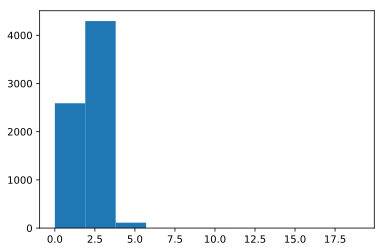

In [119]:
plt.hist(X_train['Rooms']);

In [123]:
X_train.loc[X_train['Rooms'] > 3, 'Rooms'].value_counts()

4.0     100
5.0      13
10.0      2
6.0       1
19.0      1
Name: Rooms, dtype: int64

In [126]:
X_valid.loc[X_valid['Rooms'] > 3, 'Rooms'].value_counts()

4.0    50
5.0     5
Name: Rooms, dtype: int64

In [125]:
data_test.loc[data_test['Rooms'] > 3, 'Rooms'].value_counts()

4.0     90
5.0      7
6.0      2
17.0     1
Name: Rooms, dtype: int64

In [130]:
X_train.loc[X_train['Rooms'].isin([10, 19])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,NaN,5,15,1
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1


In [131]:
X_train.loc[X_train['Id'].isin([5927, 14865]), 'Rooms'] = 2

In [132]:
X_train.loc[X_train['Id'] == 8491, 'Rooms'] = 1

In [127]:
data_test.loc[data_test['Rooms'] == 17, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [128]:
data_test.loc[data_test['Id'] == 1435, 'Rooms'] = 2

In [129]:
data_test.loc[data_test['Rooms'] > 3, 'Rooms'].value_counts()

4.0    90
5.0     7
6.0     2
Name: Rooms, dtype: int64

In [186]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,7000.000000,7000.000000,7000.000000,7000.000000,5544.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,3665.000000,7000.000000,7000.000000,7000.000000
mean,8385.493429,50.687286,1.889000,56.205197,36.249696,6.482429,8.485286,12.587286,1984.694571,0.119380,0.988714,0.972000,24.572429,5306.521714,8.123000,1143.267394,1.331714,4.214000,0.918571
std,4846.222527,43.717704,0.813407,20.284347,18.234259,33.996835,5.239792,6.778839,18.464050,0.119603,0.105641,0.164985,17.380471,3952.878964,23.909773,1012.890851,1.503140,4.785101,0.273512
min,2.000000,0.000000,0.000000,1.988943,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,4188.500000,20.000000,1.000000,41.799966,22.876491,1.000000,4.000000,9.000000,1973.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000
50%,8369.500000,37.000000,2.000000,52.473672,32.898387,6.000000,7.000000,12.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,12572.250000,75.000000,2.000000,65.925548,45.128052,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,35.000000,7077.000000,5.000000,1548.000000,2.000000,5.000000,1.000000
max,16798.000000,208.000000,6.000000,604.705972,263.542020,2014.000000,42.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


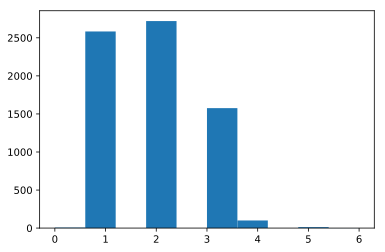

In [188]:
plt.hist(X_train['Rooms']);

In [187]:
X_train.loc[X_train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,1,1,43,8429,3,NaN,3,9,1
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,1,9,1892,0,NaN,0,1,1
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,1,1,2,469,0,NaN,0,0,1
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,1,1,30,6207,1,1183.0,1,0,1
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1


In [189]:
X_valid.loc[X_valid['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,1,1,11,3097,0,NaN,0,0,1


###### LifeSquare

##### model

In [98]:
from sklearn.ensemble import RandomForestRegressor as RF

model = RF(n_estimators=100, random_state=RANDOM)

In [236]:
predicts

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [237]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,7000.000000,7000.000000,7000.000000,7000.000000,5544.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,3665.000000,7000.000000,7000.000000,7000.000000
mean,8385.493429,50.687286,1.889000,56.205197,36.249696,6.482429,8.485286,12.587286,1984.694571,0.119380,0.988714,0.972000,24.572429,5306.521714,8.123000,1143.267394,1.331714,4.214000,0.918571
std,4846.222527,43.717704,0.813407,20.284347,18.234259,33.996835,5.239792,6.778839,18.464050,0.119603,0.105641,0.164985,17.380471,3952.878964,23.909773,1012.890851,1.503140,4.785101,0.273512
min,2.000000,0.000000,0.000000,1.988943,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,4188.500000,20.000000,1.000000,41.799966,22.876491,1.000000,4.000000,9.000000,1973.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000
50%,8369.500000,37.000000,2.000000,52.473672,32.898387,6.000000,7.000000,12.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,12572.250000,75.000000,2.000000,65.925548,45.128052,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,35.000000,7077.000000,5.000000,1548.000000,2.000000,5.000000,1.000000
max,16798.000000,208.000000,6.000000,604.705972,263.542020,2014.000000,42.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [238]:
feats = [
#      'Id',
     'DistrictId',
     'Rooms',
     'Square',
#      'LifeSquare',
     'KitchenSquare',
     'Floor',
     'HouseFloor',
     'HouseYear',
     'Ecology_1',
     'Ecology_2',
     'Ecology_3',
     'Social_1',
     'Social_2',
     'Social_3',
#      'Healthcare_1',
     'Helthcare_2',
     'Shops_1',
     'Shops_2'
]

In [239]:
model.fit(X_train[feats], y_train)

y_pred = model.predict(X_valid[feats])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=427, verbose=0, warm_start=False)

In [229]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

r2(y_valid, y_pred)

In [242]:
pd.DataFrame(model.feature_importances_,
                                        columns=['Importance'],
                                        index=feats).sort_values(by='Importance', ascending=False)

,Importance
Square,0.396086
Social_2,0.121445
Rooms,0.080548
Social_1,0.076355
Social_3,0.058768
DistrictId,0.051294
HouseYear,0.045276
Ecology_1,0.042737
Floor,0.036997
KitchenSquare,0.030027


In [231]:
feauters_importance_list = list(pd.DataFrame(model.feature_importances_,
                                        columns=['Importance'],
                                        index=feats).sort_values(by='Importance', ascending=False).index)

In [232]:
r2_list = [0.7235366877443223,]
features_minus_list = ['All Feauters']
while len(feauters_importance_list) > 1:
    features_minus_list.append(feauters_importance_list.pop())
    model.fit(X_train[feauters_importance_list], y_train)
    y_pred = model.predict(X_valid[feauters_importance_list])
    r2_list.append(r2(y_valid, y_pred))

In [246]:
pd.DataFrame([features_minus_list, r2_list]).T

,0,1
0,All Feauters,0.723537
1,Ecology_2,0.721576
2,Ecology_3,0.723206
3,Shops_2,0.722779
4,Helthcare_2,0.724423
5,Shops_1,0.72475
6,HouseFloor,0.721584
7,KitchenSquare,0.716687
8,Floor,0.709116
9,Ecology_1,0.708966


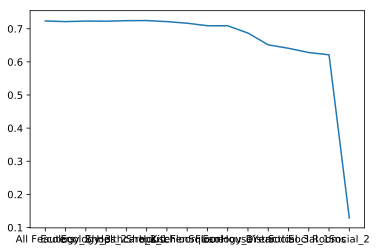

In [243]:
plt.plot(features_minus_list, r2_list)